In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from google.colab import files, drive

In [ ]:
sns.set()
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/Studia/DS/Sem2/AML/Project2/Data'

In [3]:
X = np.loadtxt(data_path+'/x_train.txt')
y = np.loadtxt(data_path+'/y_train.txt')
test = np.loadtxt(data_path+'/x_test.txt')

NameError: name 'data_path' is not defined

In [5]:
import pandas as pd
# import lightgbm as lgb
# import xgboost as xgb
# from catboost import CatBoostClassifier, Pool
from metrics import  accuracy
import numpy as np
import matplotlib.cm
from sklearn.pipeline import Pipeline
from sklearn.metrics import balanced_accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, SelectFromModel, RFE, VarianceThreshold, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC

from sklearn.feature_extraction.text import CountVectorizer
from experiments import *

# from catboost import CatBoostClassifier, Pool
import matplotlib.pyplot as plt

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

simplefilter("ignore", category=ConvergenceWarning)
simplefilter("ignore", category=RuntimeWarning) 
simplefilter("ignore", category=UserWarning)

In [9]:
RANDOM_STATE = 42

x_train_path = "./../../data/x_train.txt"
y_train_path = "./../../data/y_train.txt"

x_test_path = "./../../data/x_test.txt"


X = pd.read_csv(x_train_path, delim_whitespace=True, header=None)
y = pd.read_csv(y_train_path, delim_whitespace=True, header=None)
test = pd.read_csv(x_test_path, delim_whitespace=True, header=None)

X = X.values
test = test.values


/tmp/ipykernel_90656/2324981235.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X = pd.read_csv(x_train_path, delim_whitespace=True, header=None)
/tmp/ipykernel_90656/2324981235.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y = pd.read_csv(y_train_path, delim_whitespace=True, header=None)
/tmp/ipykernel_90656/2324981235.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test = pd.read_csv(x_test_path, delim_whitespace=True, header=None)


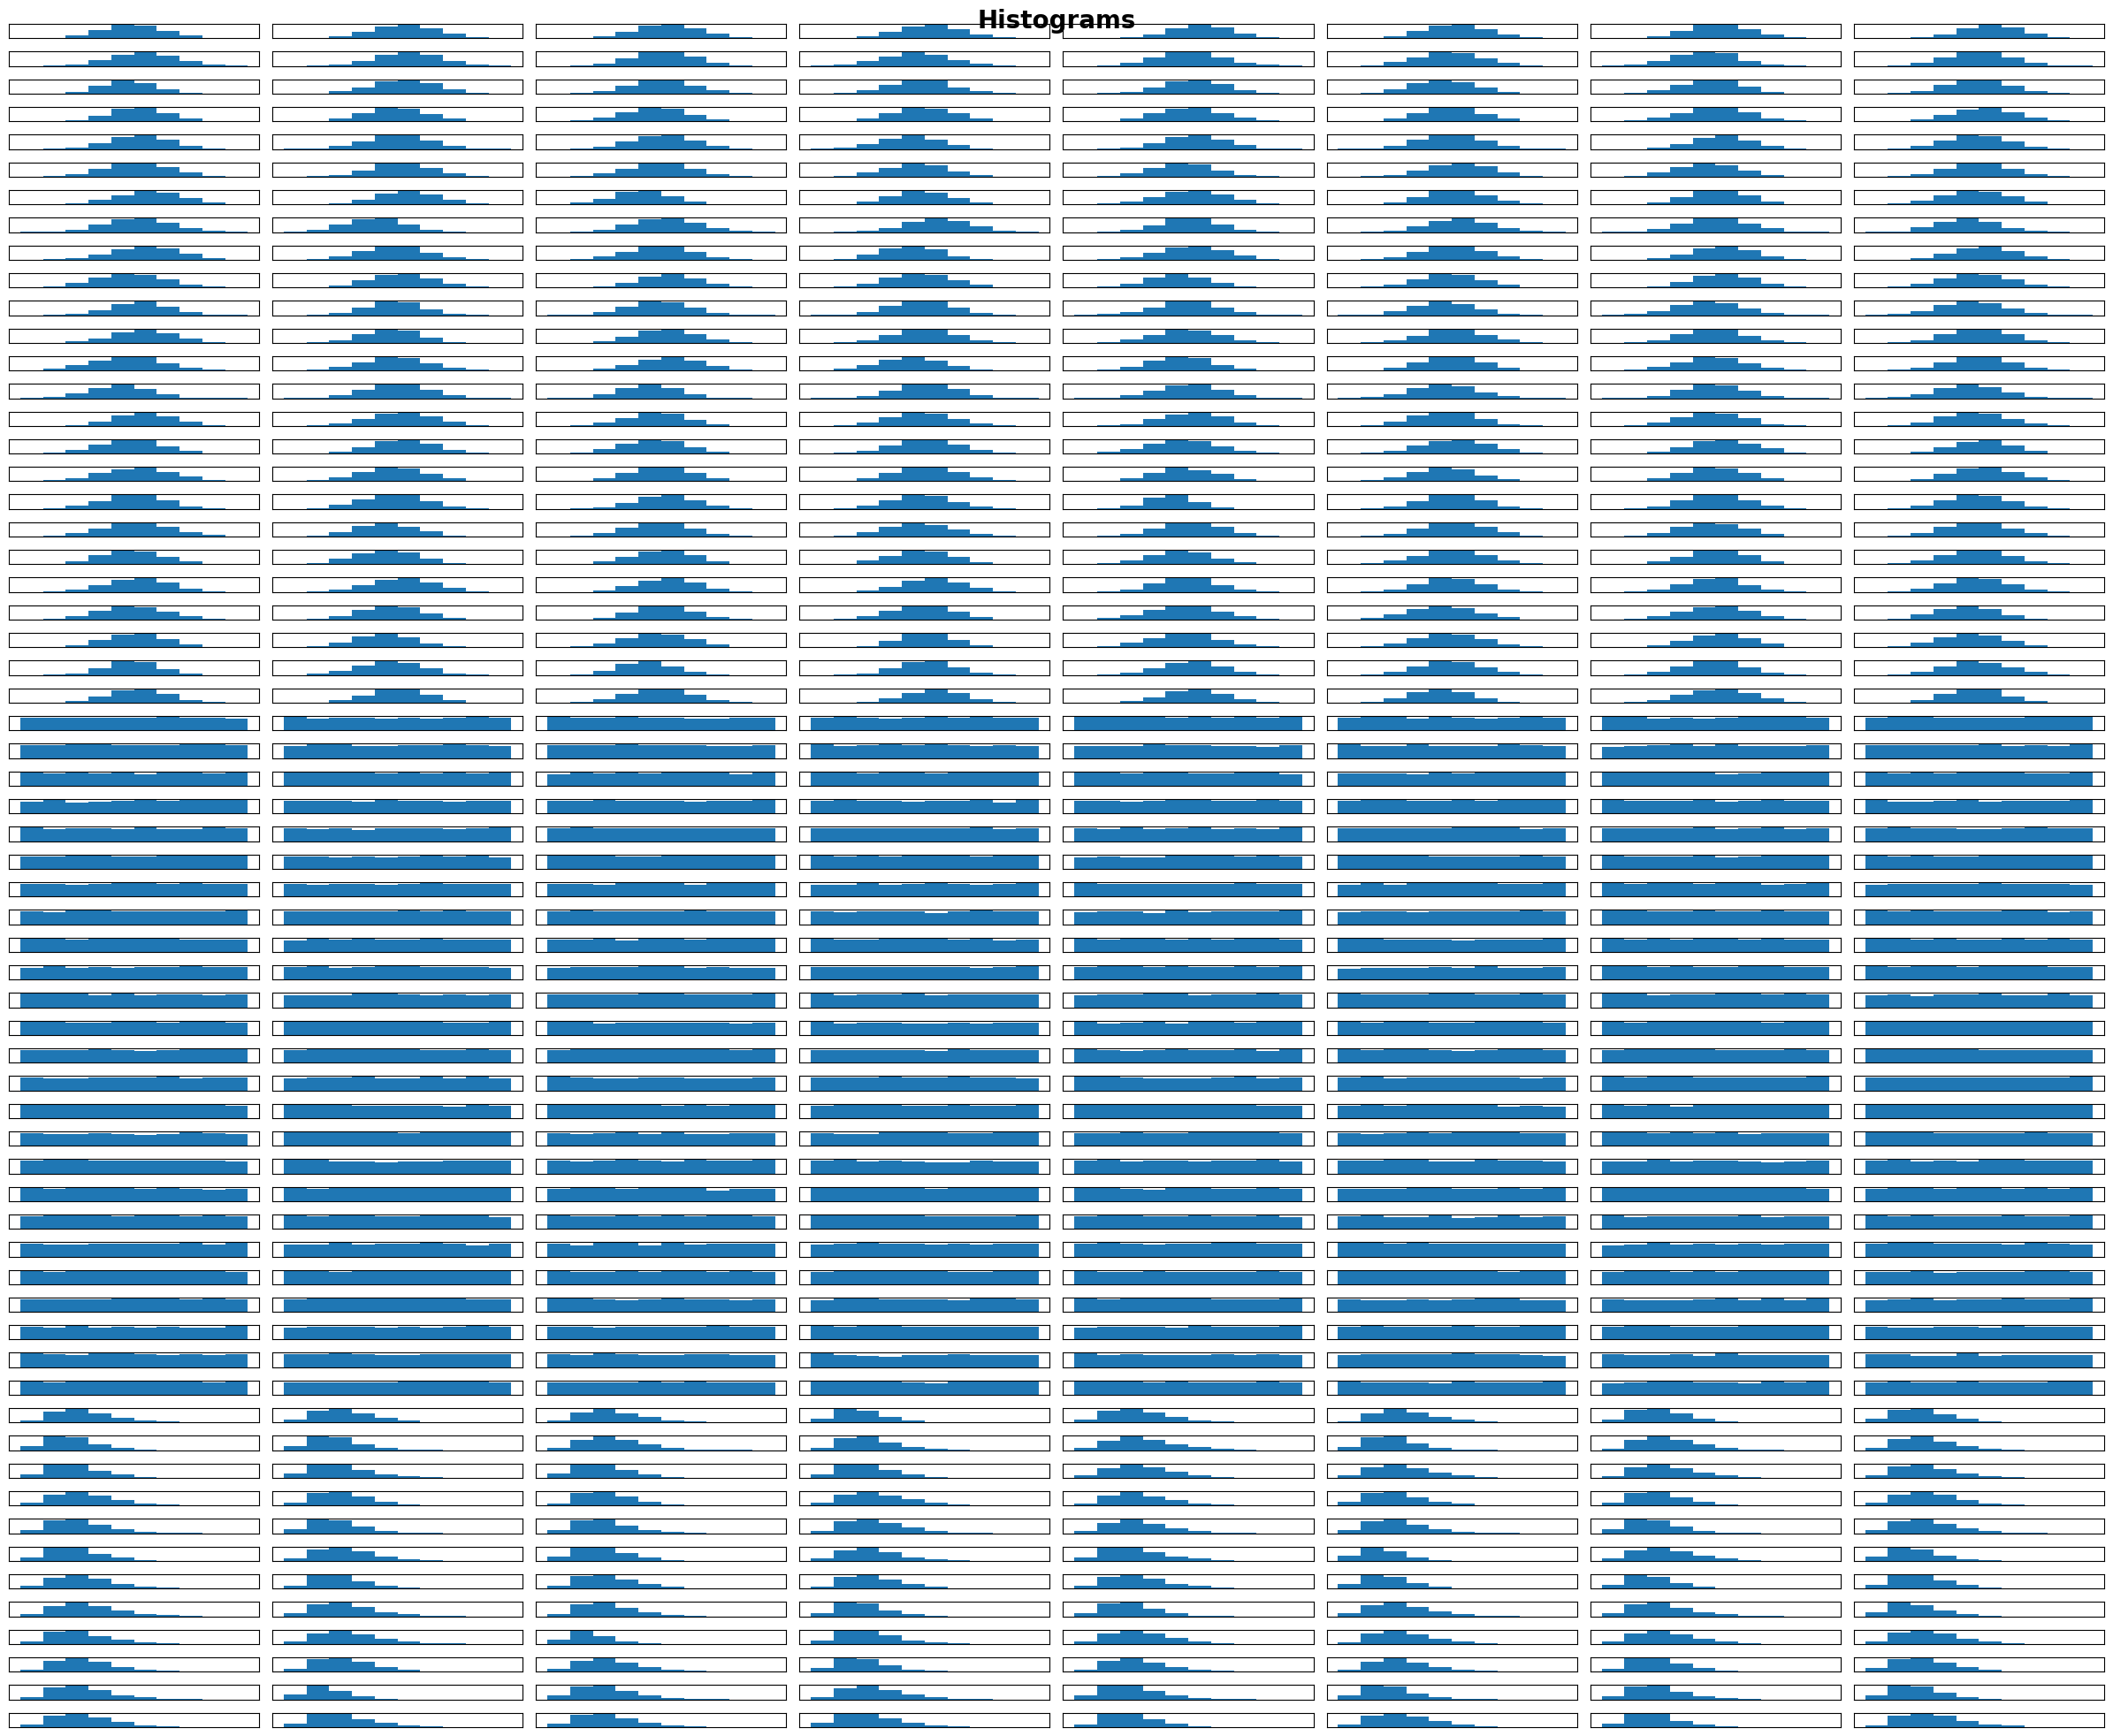

In [10]:
fig, ax = plt.subplots(62, 8, figsize = (24, 20))
k = 0
for i in range(62):
  for j in range(8):
    ax[i,j].hist(X[:, k])
    ax[i,j].set_yticks([])
    ax[i,j].set_xticks([])
    k += 1
plt.suptitle("Histograms", fontsize=20, weight='bold')
plt.tight_layout()
plt.savefig('histograms.png')
plt.show()

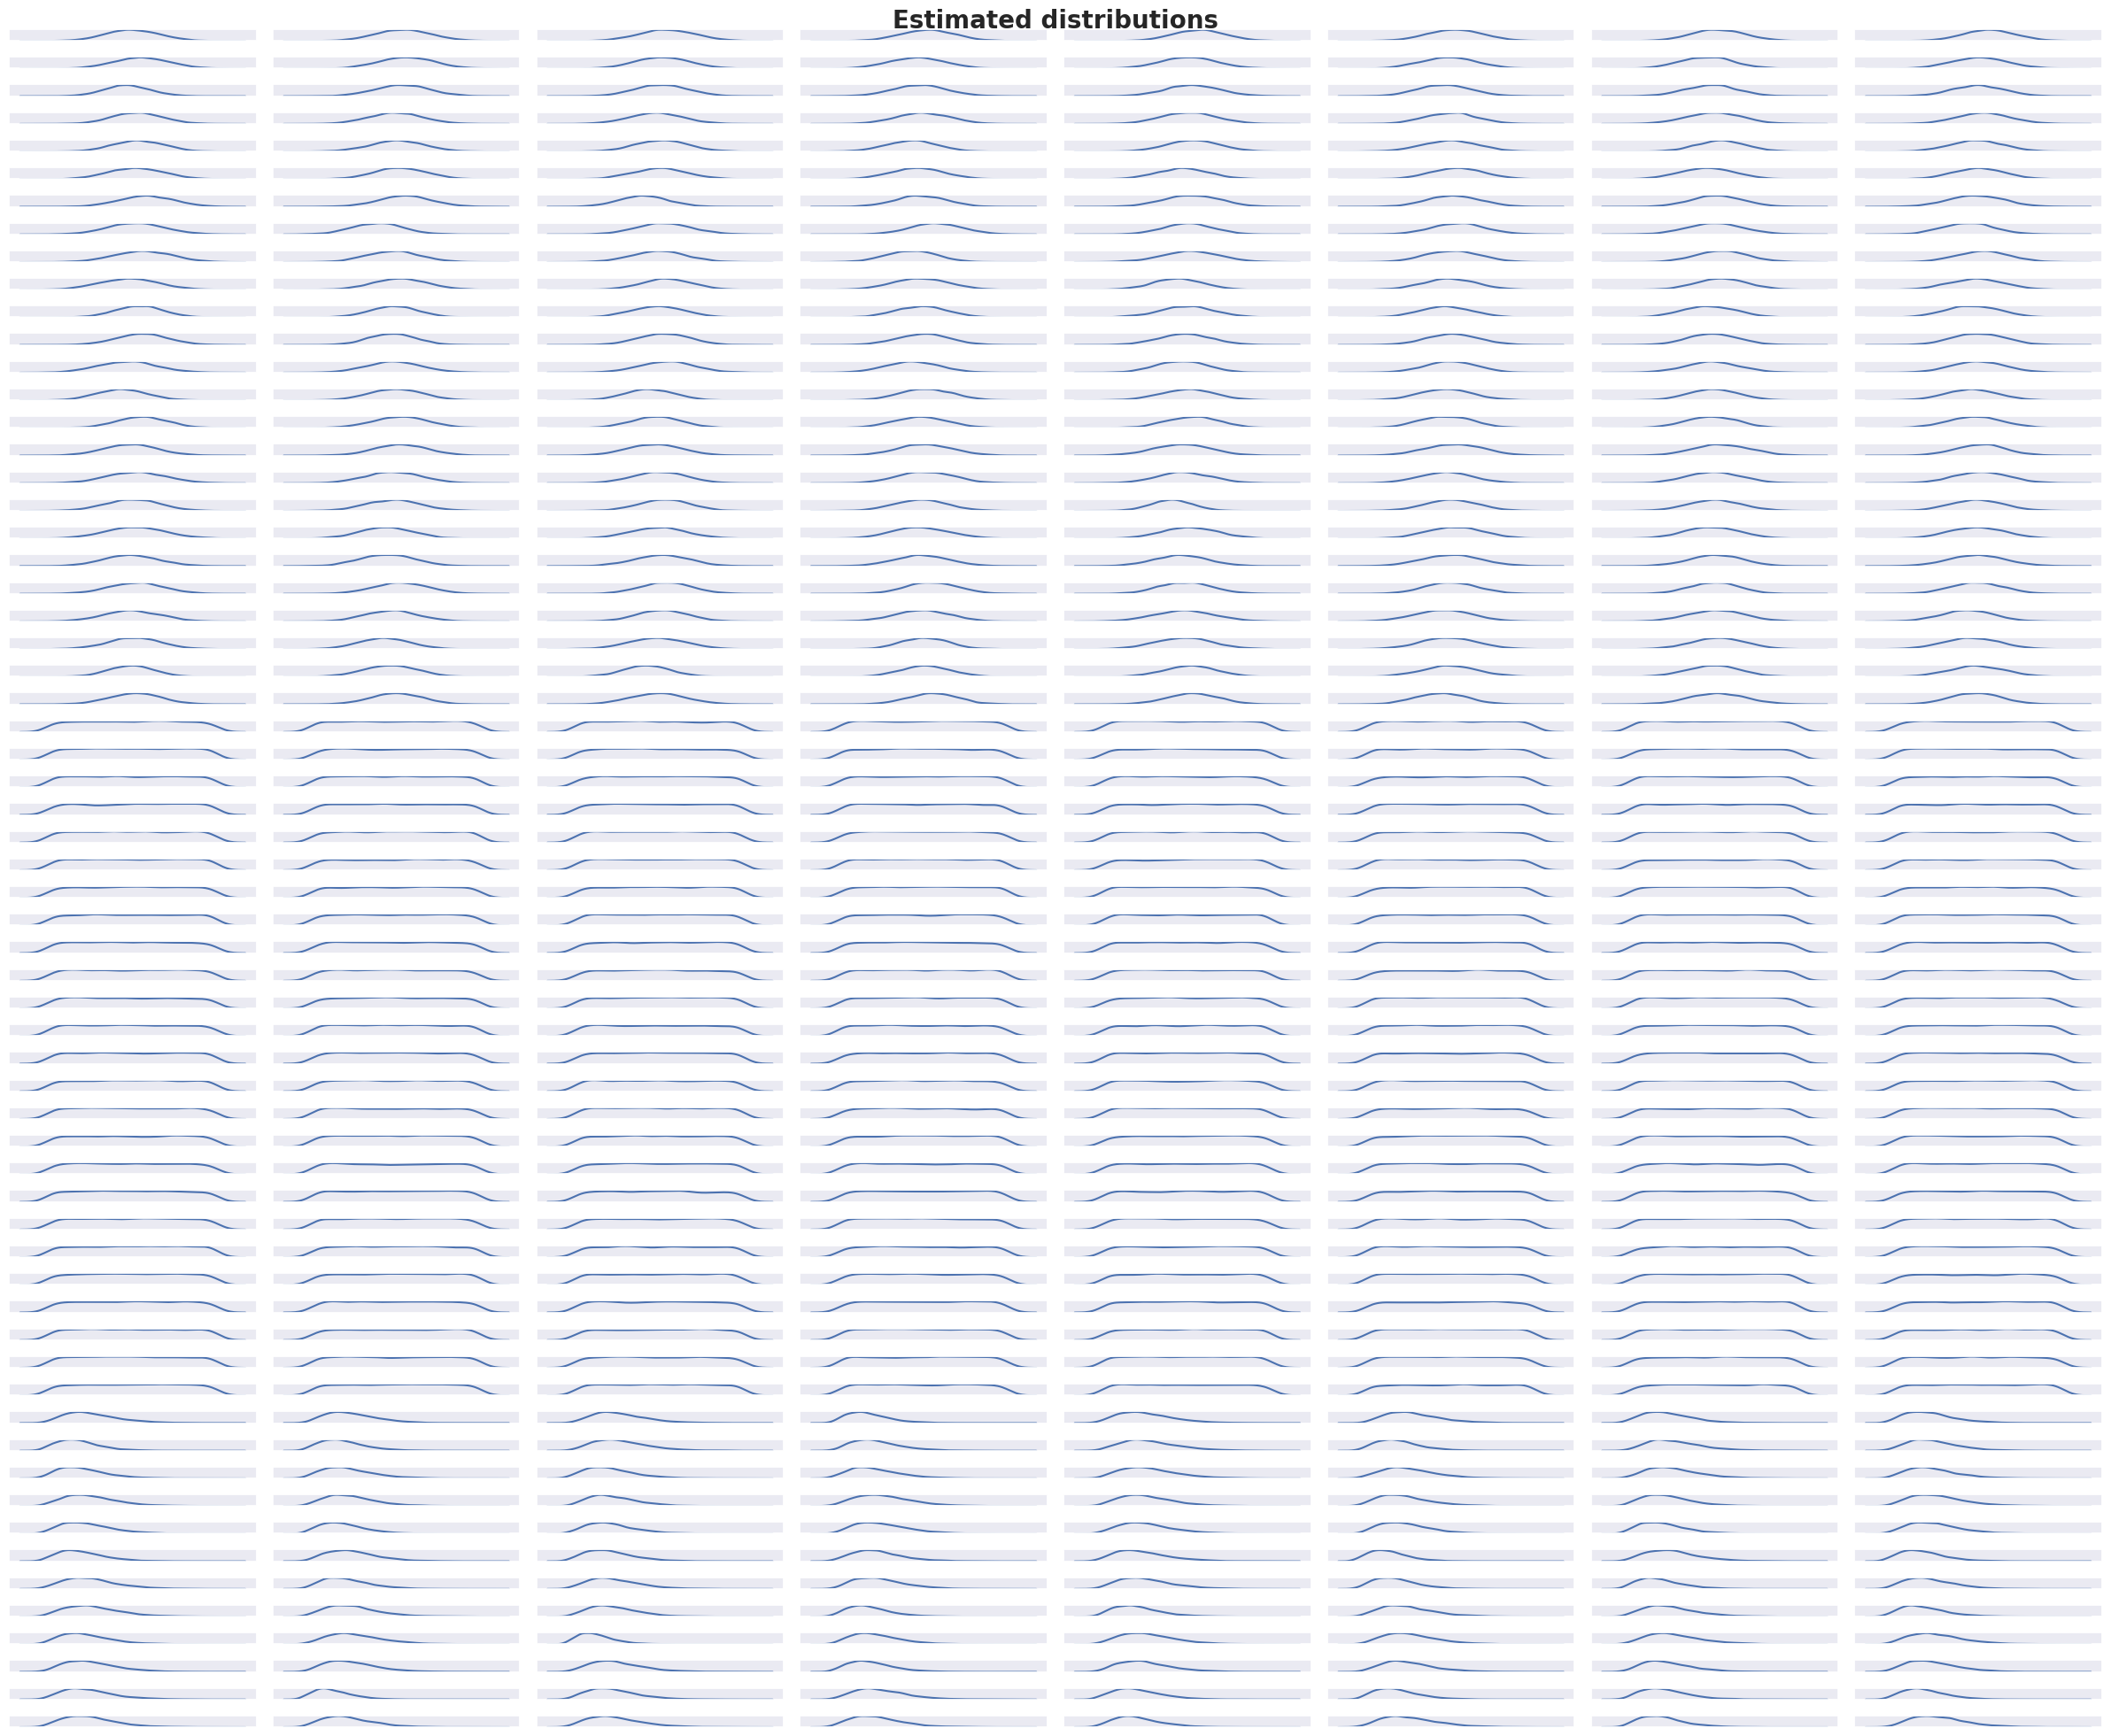

In [ ]:
fig, ax = plt.subplots(62, 8, figsize = (24, 20))
k = 0
for i in range(62):
  for j in range(8):
    sns.kdeplot(X[:, k], ax=ax[i, j])
    ax[i,j].set_yticks([])
    ax[i,j].set_xticks([])
    ax[i,j].set_xlabel('')
    ax[i,j].set_ylabel('')
    k += 1
plt.suptitle("Estimated distributions", fontsize=20, weight='bold')
plt.tight_layout()
plt.savefig("distributions.png")
plt.show()


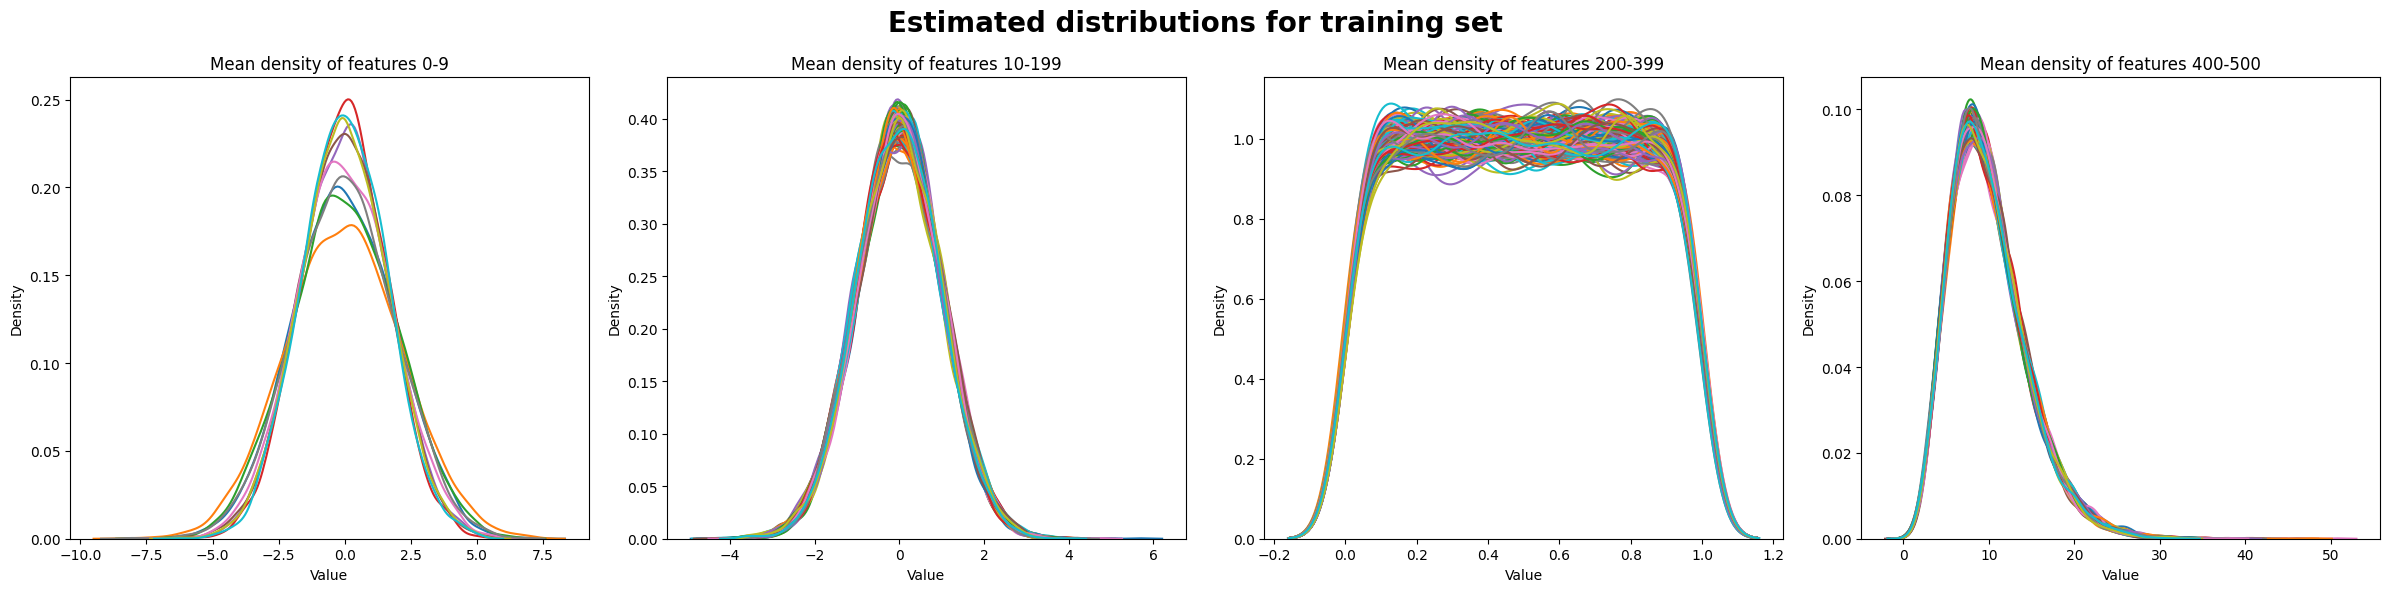

In [27]:
fig, ax = plt.subplots(1, 4, figsize = (24, 6))

for k in range(10):
    sns.kdeplot(X[:, k], ax=ax[0])
ax[0].set_title('Mean density of features 0-9')
ax[0].set_xlabel('Value')
ax[0].set_ylabel('Density')

for k in range(10, 200):
    sns.kdeplot(X[:, k], ax=ax[1])
ax[1].set_title('Mean density of features 10-199')
ax[1].set_xlabel('Value')
ax[1].set_ylabel('Density')

for k in range(200, 400):
    sns.kdeplot(X[:, k], ax=ax[2])
ax[2].set_title('Mean density of features 200-399')
ax[2].set_xlabel('Value')
ax[2].set_ylabel('Density')

for k in range(400, 500):
    sns.kdeplot(X[:, k], ax=ax[3])
ax[3].set_title('Mean density of features 400-500')
ax[3].set_xlabel('Value')
ax[3].set_ylabel('Density')

plt.suptitle("Estimated distributions for training set", fontsize=20, weight='bold')
plt.tight_layout()
plt.savefig("distributions.png")
plt.show()

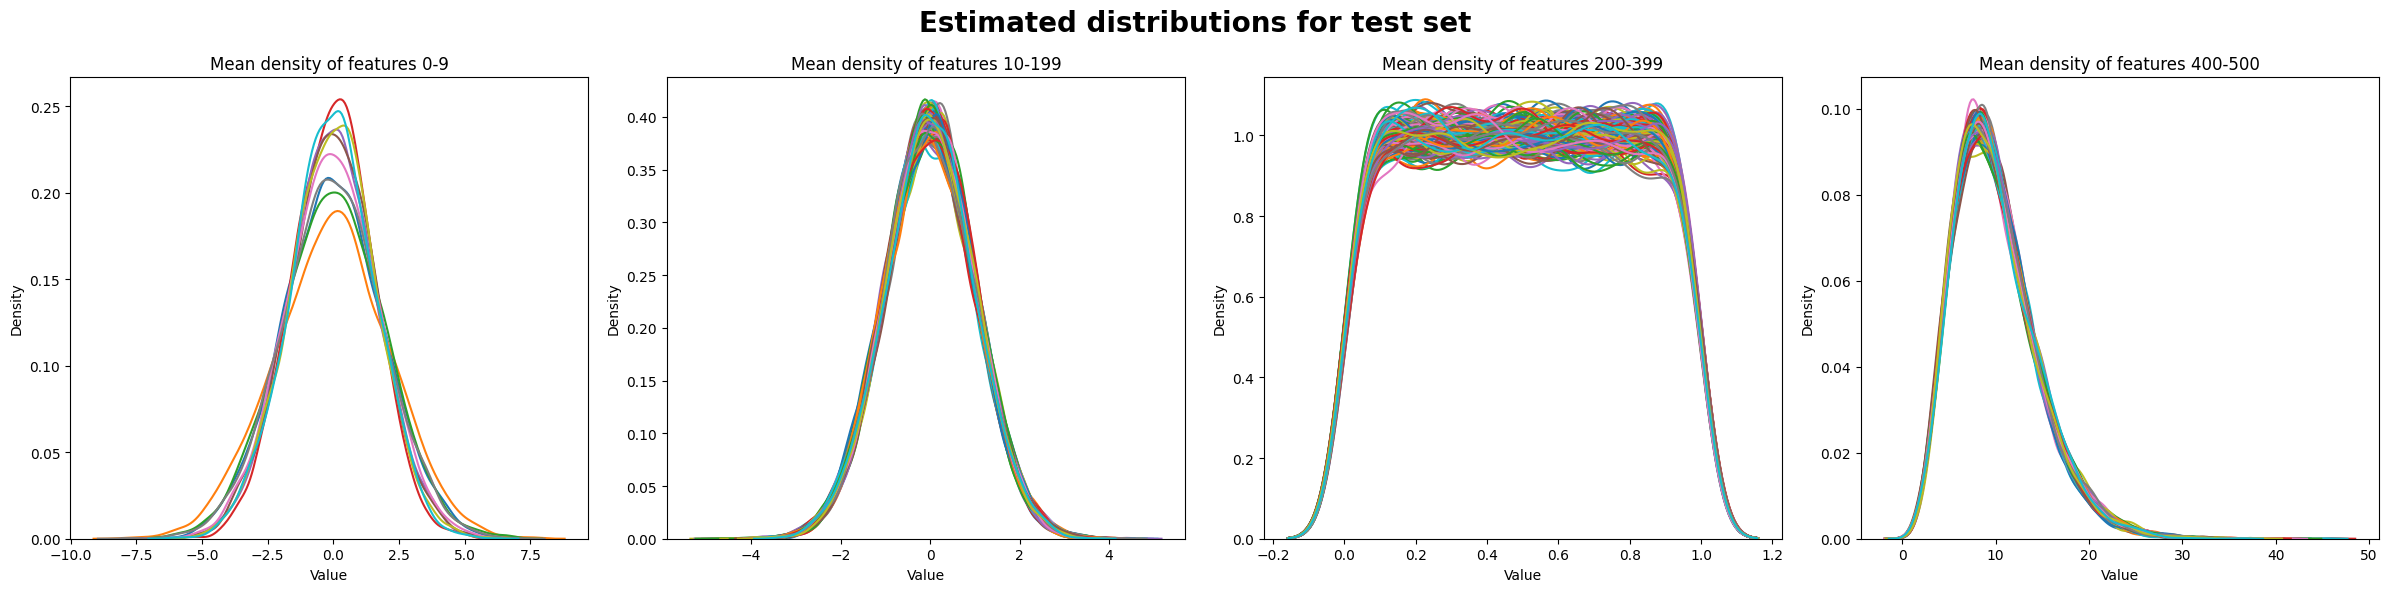

In [28]:
fig, ax = plt.subplots(1, 4, figsize = (24, 6))

for k in range(10):
    sns.kdeplot(test[:, k], ax=ax[0])
ax[0].set_title('Mean density of features 0-9')
ax[0].set_xlabel('Value')
ax[0].set_ylabel('Density')

for k in range(10, 200):
    sns.kdeplot(test[:, k], ax=ax[1])
ax[1].set_title('Mean density of features 10-199')
ax[1].set_xlabel('Value')
ax[1].set_ylabel('Density')

for k in range(200, 400):
    sns.kdeplot(test[:, k], ax=ax[2])
ax[2].set_title('Mean density of features 200-399')
ax[2].set_xlabel('Value')
ax[2].set_ylabel('Density')

for k in range(400, 500):
    sns.kdeplot(test[:, k], ax=ax[3])
ax[3].set_title('Mean density of features 400-500')
ax[3].set_xlabel('Value')
ax[3].set_ylabel('Density')

plt.suptitle("Estimated distributions for test set", fontsize=20, weight='bold')
plt.tight_layout()
plt.savefig("distributions.png")
plt.show()

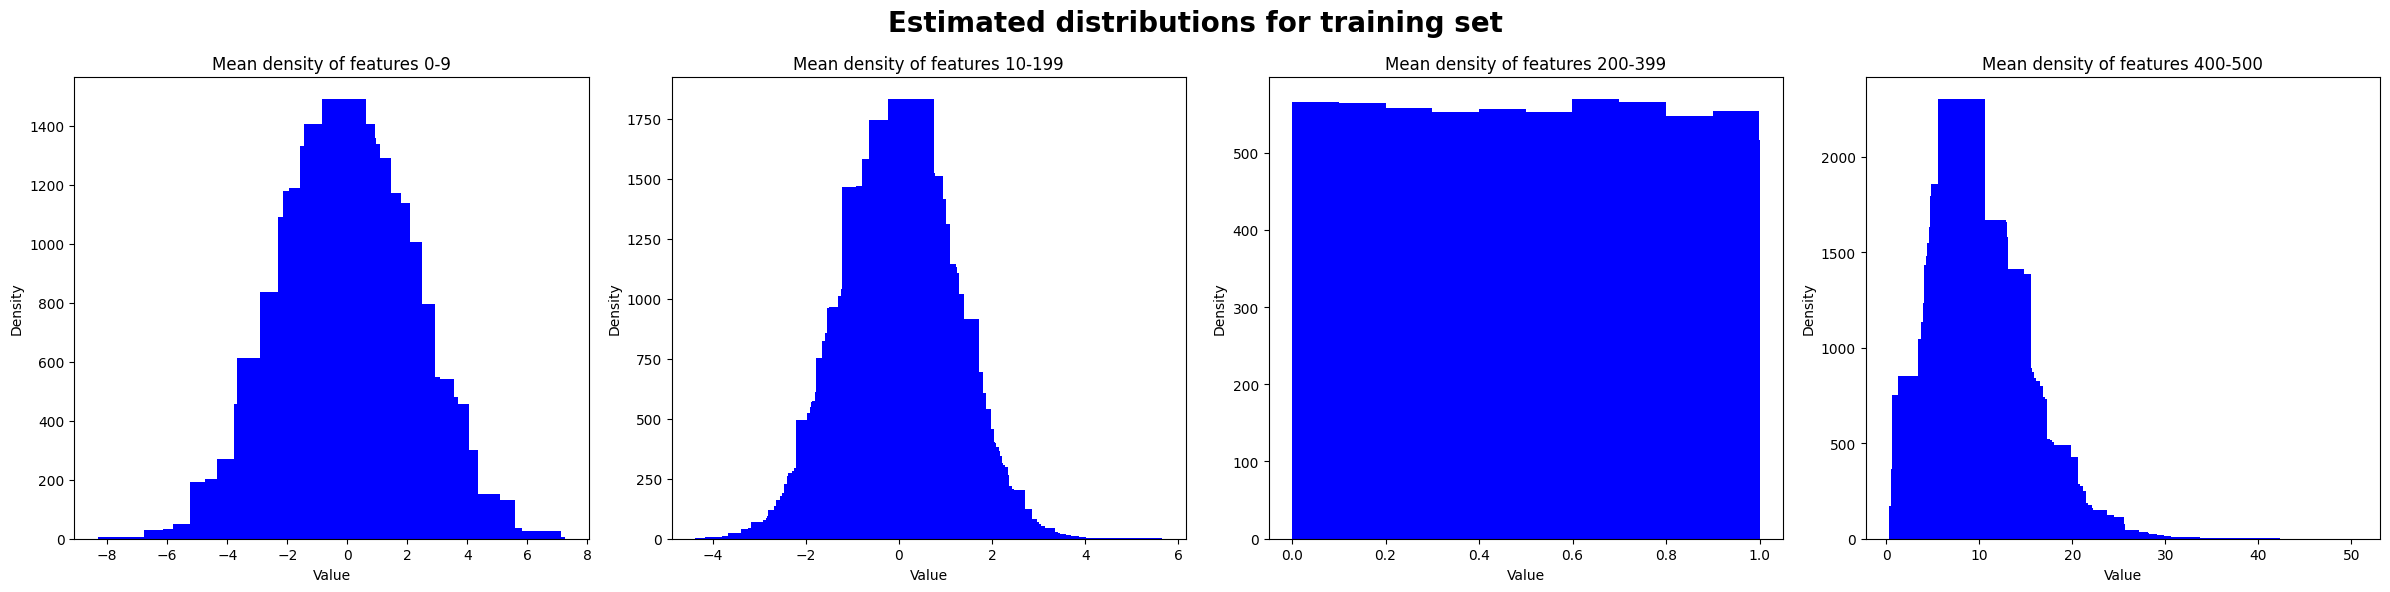

In [29]:
fig, ax = plt.subplots(1, 4, figsize = (24, 6))

for k in range(10):
    ax[0].hist(X[:, k], color='blue')
ax[0].set_title('Mean density of features 0-9')
ax[0].set_xlabel('Value')
ax[0].set_ylabel('Density')

for k in range(10, 200):
    ax[1].hist(X[:, k], color='blue')
ax[1].set_title('Mean density of features 10-199')
ax[1].set_xlabel('Value')
ax[1].set_ylabel('Density')

for k in range(200, 400):
    ax[2].hist(X[:, k], color='blue')
ax[2].set_title('Mean density of features 200-399')
ax[2].set_xlabel('Value')
ax[2].set_ylabel('Density')

for k in range(400, 500):
    ax[3].hist(X[:, k], color='blue')
ax[3].set_title('Mean density of features 400-500')
ax[3].set_xlabel('Value')
ax[3].set_ylabel('Density')

plt.suptitle("Estimated distributions for training set", fontsize=20, weight='bold')
plt.tight_layout()
plt.savefig("distributions.png")
plt.show()

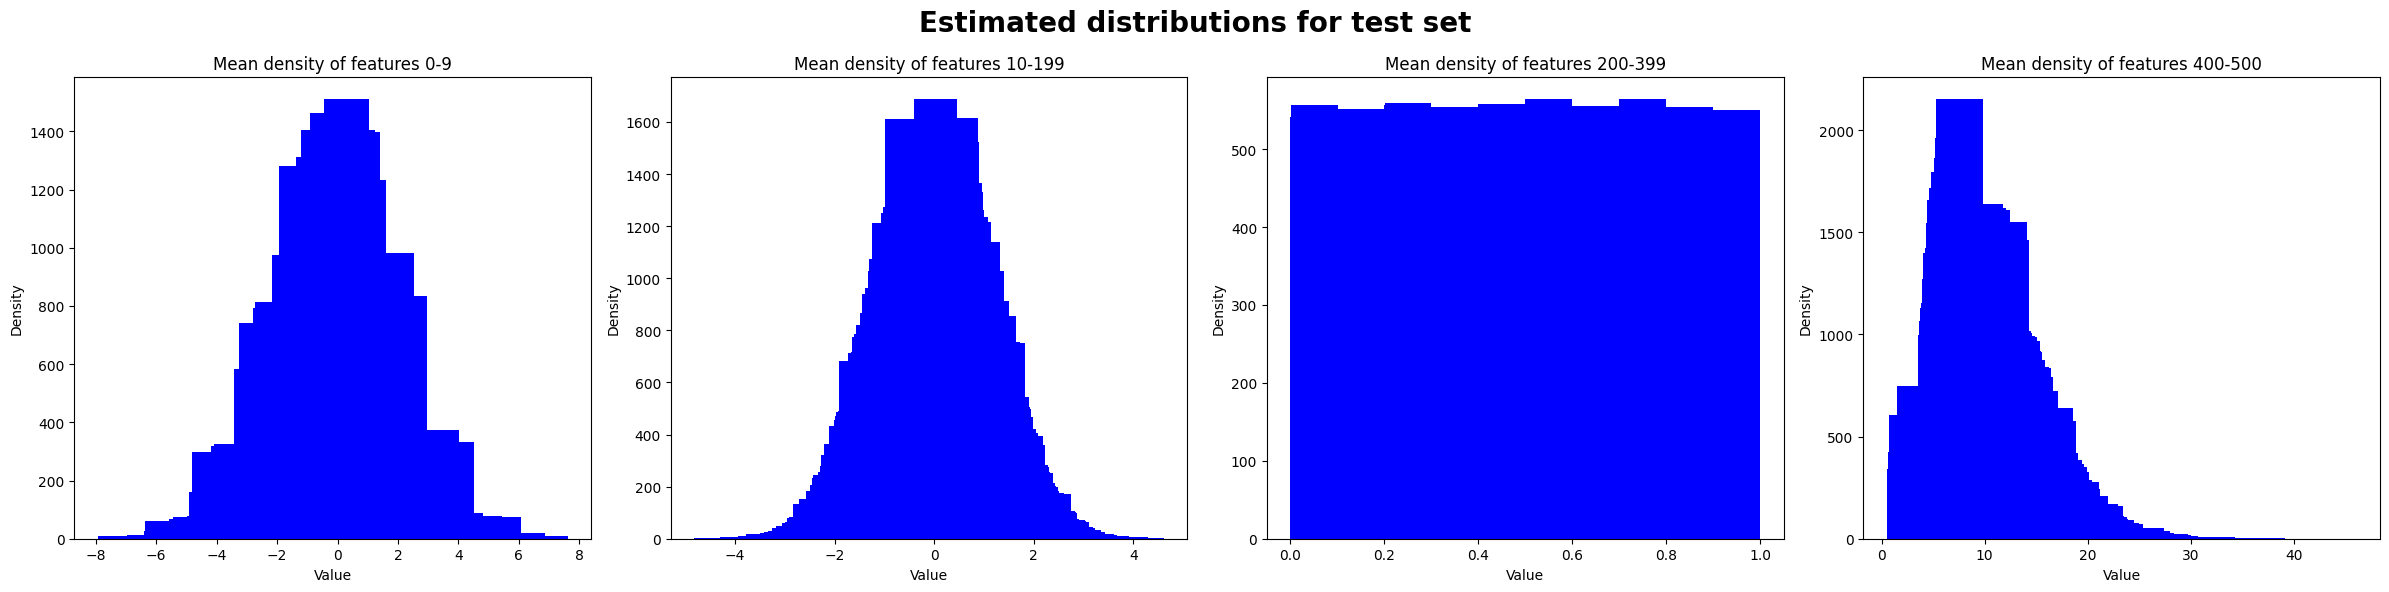

In [30]:
fig, ax = plt.subplots(1, 4, figsize = (24, 6))

for k in range(10):
    ax[0].hist(test[:, k], color='blue')
ax[0].set_title('Mean density of features 0-9')
ax[0].set_xlabel('Value')
ax[0].set_ylabel('Density')

for k in range(10, 200):
    ax[1].hist(test[:, k], color='blue')
ax[1].set_title('Mean density of features 10-199')
ax[1].set_xlabel('Value')
ax[1].set_ylabel('Density')

for k in range(200, 400):
    ax[2].hist(test[:, k], color='blue')
ax[2].set_title('Mean density of features 200-399')
ax[2].set_xlabel('Value')
ax[2].set_ylabel('Density')

for k in range(400, 500):
    ax[3].hist(test[:, k], color='blue')
ax[3].set_title('Mean density of features 400-500')
ax[3].set_xlabel('Value')
ax[3].set_ylabel('Density')

plt.suptitle("Estimated distributions for test set", fontsize=20, weight='bold')
plt.tight_layout()
plt.savefig("distributions.png")
plt.show()

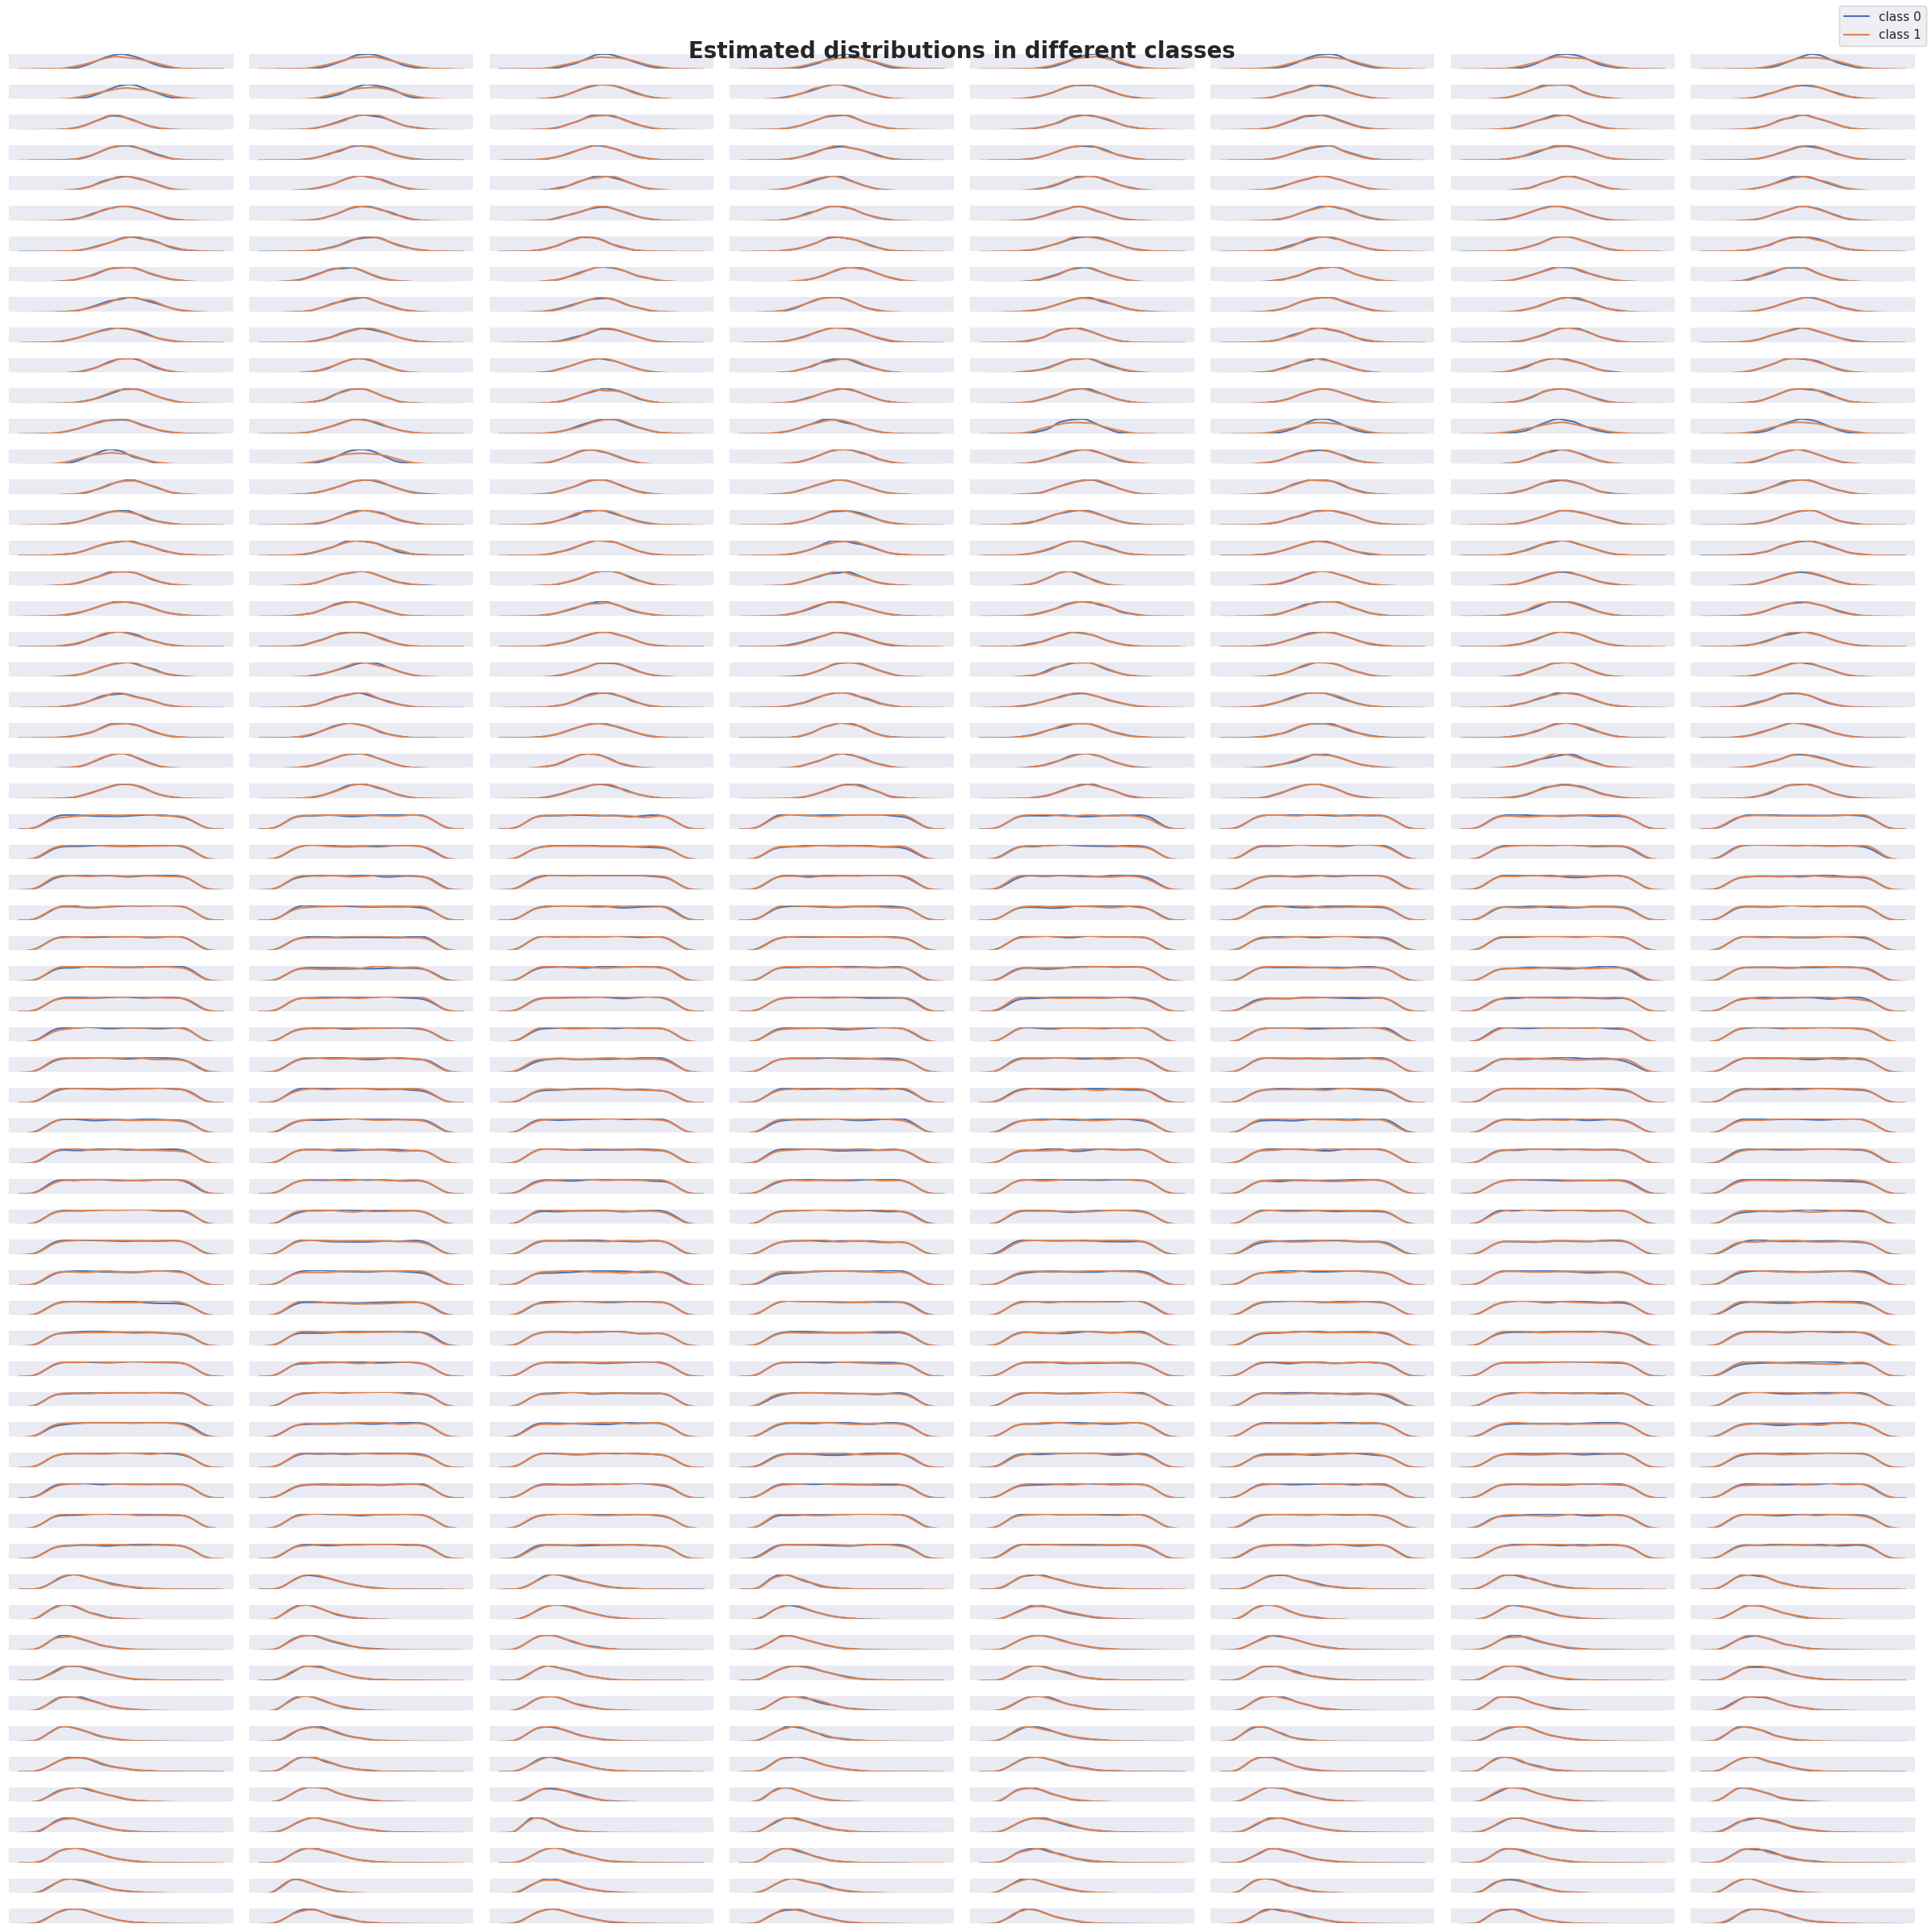

In [31]:
fig, ax = plt.subplots(62, 8, figsize = (24, 24))
k = 0
for i in range(62):
  for j in range(8):
    sns.kdeplot(X[y==0, k], ax=ax[i, j], label="class 0")
    sns.kdeplot(X[y==1, k], ax=ax[i, j], label="class 1")
    ax[i,j].set_yticks([])
    ax[i,j].set_xticks([])
    ax[i,j].set_xlabel('')
    ax[i,j].set_ylabel('')
    k += 1
handles, labels = ax[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.suptitle("Estimated distributions in different classes", fontsize=20, weight='bold')
plt.tight_layout()
plt.savefig("distributions01.png")
plt.show()

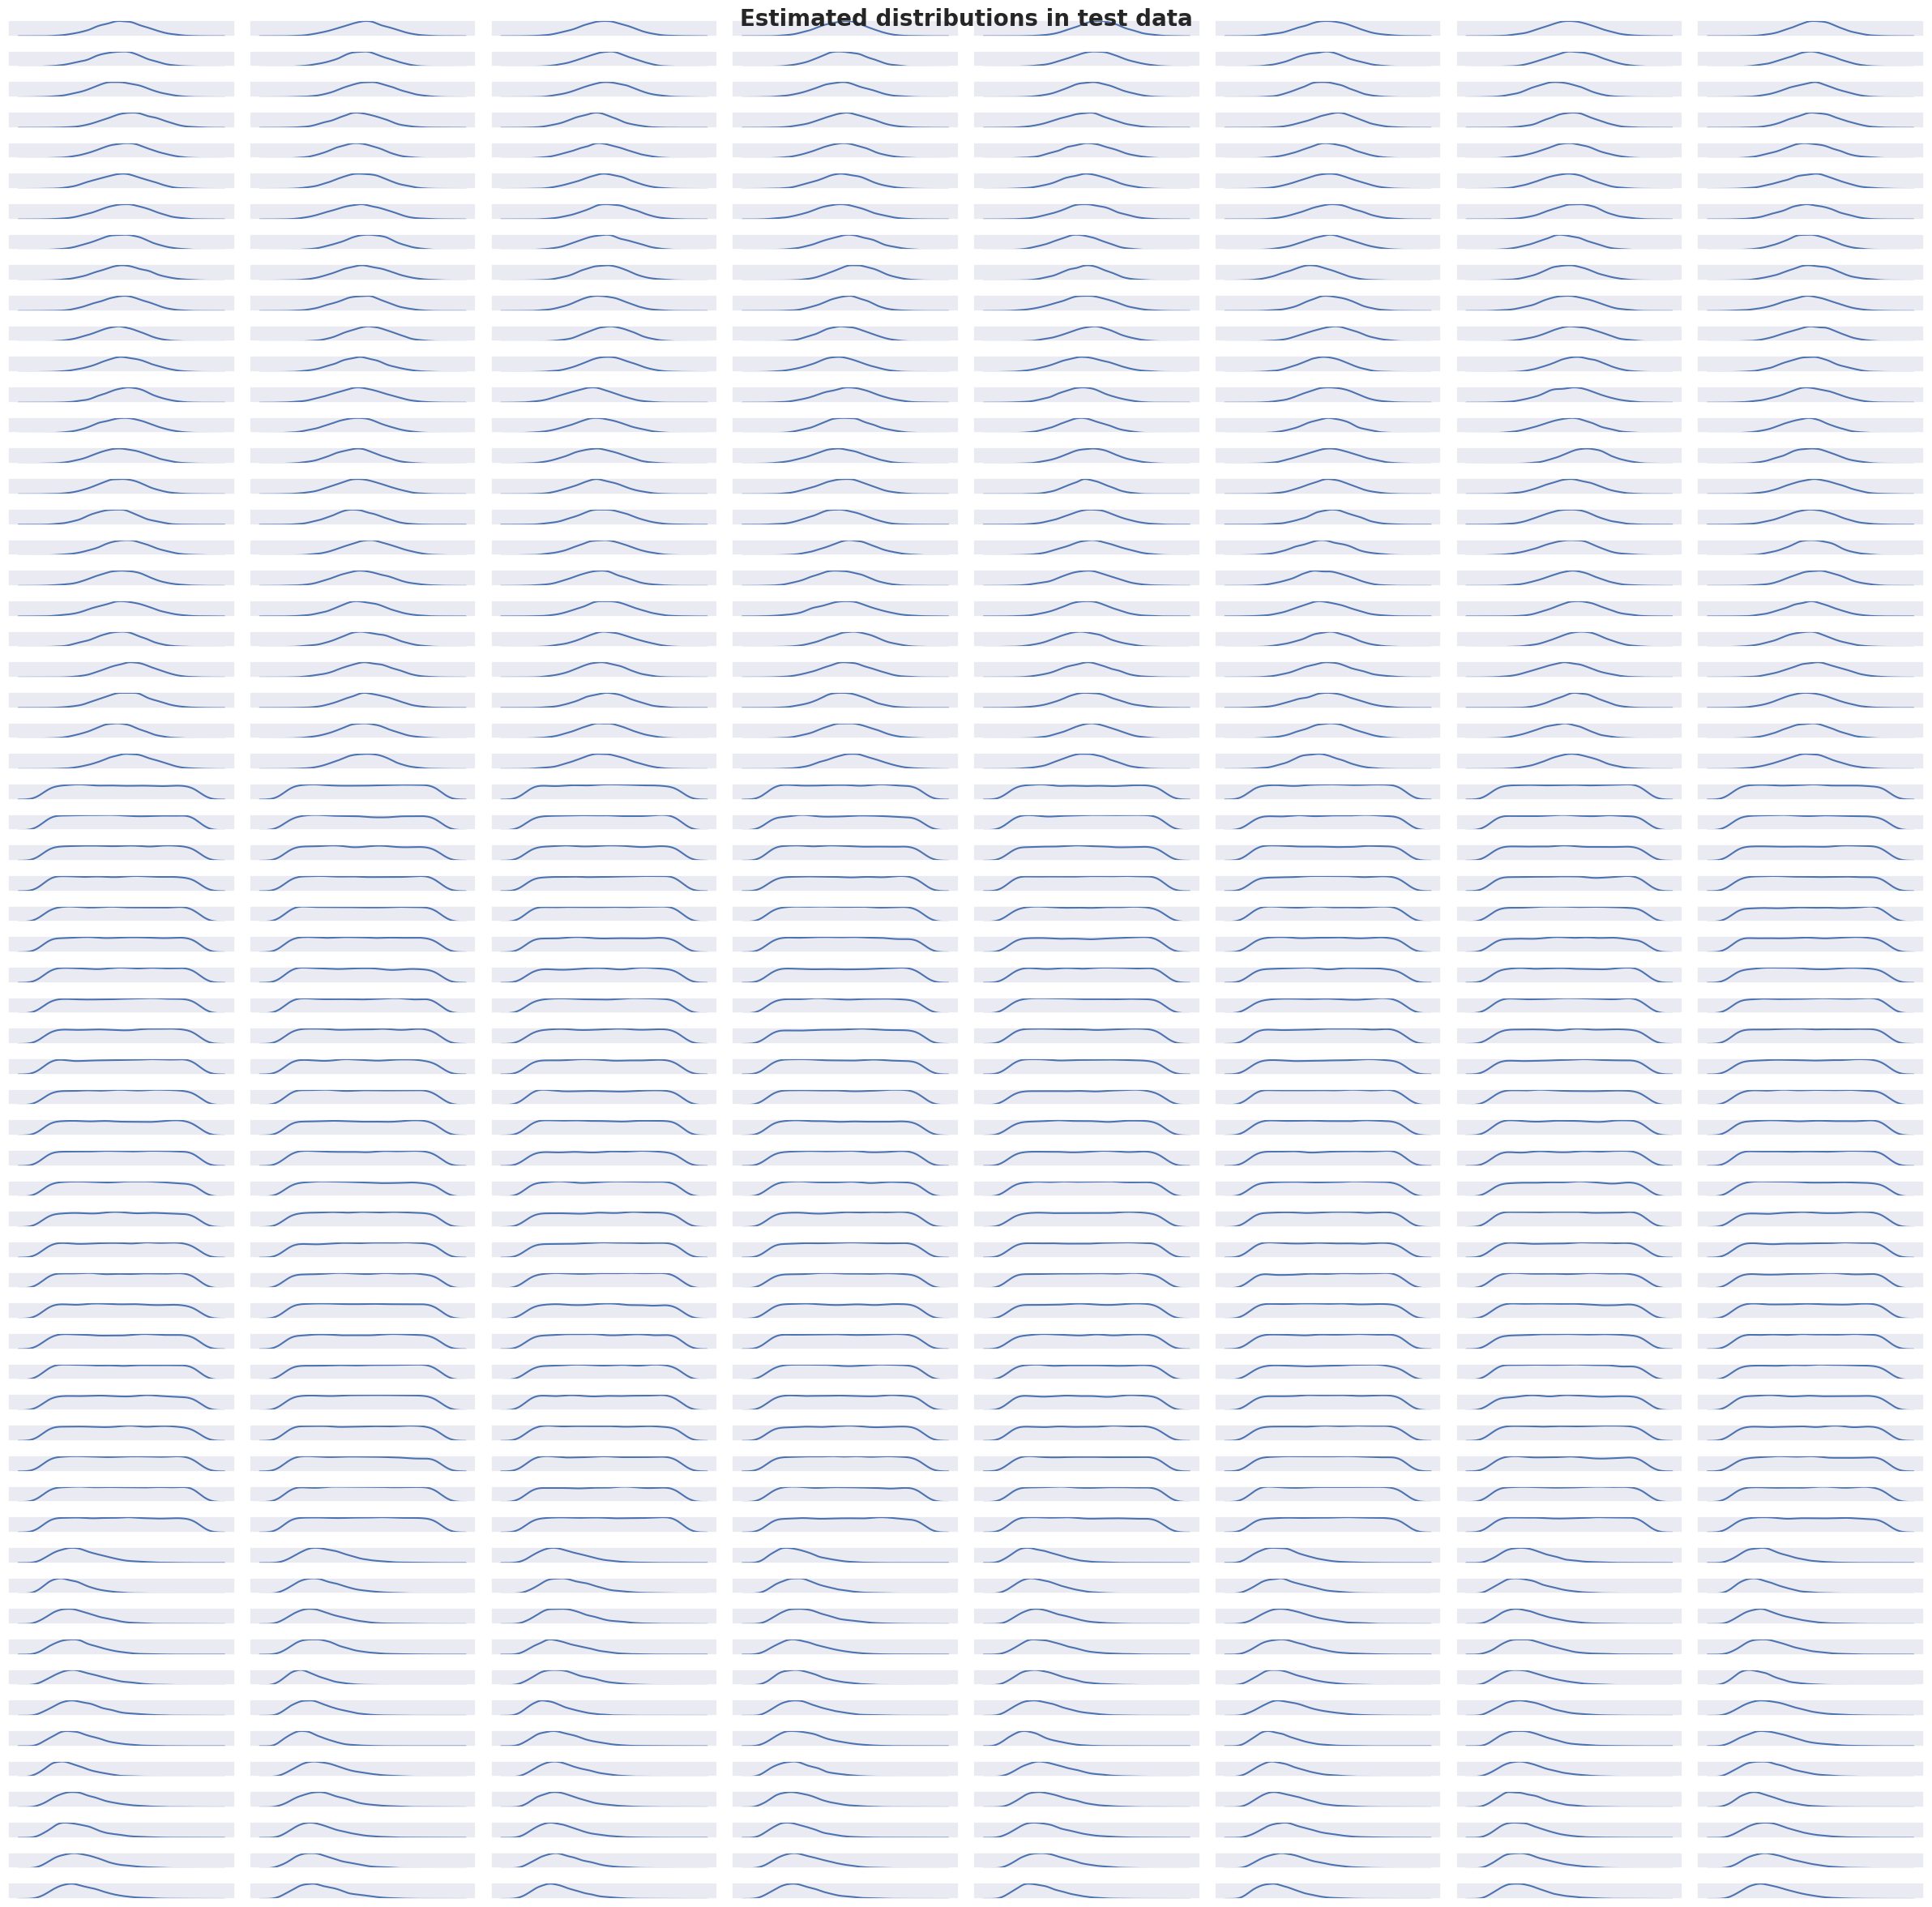

In [32]:
fig, ax = plt.subplots(62, 8, figsize = (24, 24))
k = 0
for i in range(62):
  for j in range(8):
    sns.kdeplot(test[:, k], ax=ax[i, j])
    ax[i,j].set_yticks([])
    ax[i,j].set_xticks([])
    ax[i,j].set_xlabel('')
    ax[i,j].set_ylabel('')
    k += 1
plt.suptitle("Estimated distributions in test data", fontsize=20, weight='bold')
plt.tight_layout()
plt.savefig("distributionsTest.png")
plt.show()

##Key notes from the plots

*   First 200 features have normal distribution with similar parameters.
*   Next 200 features have uniform distribution.
*   Last 100 features have smilar distrubtions, but not normal.
*   Distributions in classes are the same.
*   Distributions in test data is the same as in training.



In [33]:
files.download("histograms.png")
files.download("distributions01.png")
files.download("distributionsTest.png")
files.download("distributions.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>